# Import

In [1]:
import json
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import beta
from numpy.polynomial import polynomial as P
from scipy import stats
from scipy.stats import norm
import math
from matplotlib import gridspec
# https://stats.stackexchange.com/questions/72208/visualising-the-variance
# https://matplotlib.org/stable/gallery/statistics/violinplot.html

# Statistic helper

In [2]:
def getdistributionFromPath(path, index, extractor, dist):
    all_data  = extractor([path], index)[0]
    x = np.array(all_data)
    param =  dist.fit(x)
    (df, loc, scale) = param
    mean, var= dist.stats(loc=loc, scale=scale, df=df, moments='mv')
    return mean, var, dist, param 

In [3]:
def getdistributionFromData(data, dist):
    x = np.array(data)
    param =  dist.fit(x)
    (df, loc, scale) = param
    mean, var= dist.stats(loc=loc, scale=scale, df=df)
    return mean, var, dist, param 

In [4]:
def batchLinearHyperparameter(path, index, extractor):
    all_data = np.array(extractor(path, index))
    res = []
    for data in all_data:
        res.append((np.mean(data), np.var(data)))
    return res

In [5]:
def meanVariance(path, index, extractor):
    data = extractor([path], index)[0]
    return np.mean(data), np.var(data)

# Plot helper

In [6]:
def extractDataKNN(path, index, n_max=51):
    all_data = []
    data = None
    with open(path, 'r') as fp:
        data = json.load(fp)
        for i in range(1, n_max):
            all_data.append(data["{}".format(i)][index])
    return all_data

In [7]:
def extractDataSVMKernel(path, index,degree_max=None):
    all_data = []
    data = None
    with open(path, 'r') as fp:
        data = json.load(fp)
        for kernel in ['linear', 'rbf', 'sigmoid', ]:
            all_data.append(data[kernel][index])
    return all_data

In [8]:
def extractDataSVMKernelPoly(path, index,degree_max=30):
    all_data = []
    data = None
    with open(path, 'r') as fp:
        data = json.load(fp)
        for i in range(0, degree_max):
            all_data.append(data["{}".format(i)][index])
    return all_data
    

In [9]:
def extractDataTree(path, index,cond_max=49):
    all_data = []
    data = None
    with open(path, 'r') as fp:
        data = json.load(fp)
        for i in range(1, cond_max):
            all_data.append(data["{}".format(i)][index])
    return all_data

In [10]:
def plotBoxPlot(path, names, index, extractor, x_label, y_label,element_max):
    # https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
    # https://wikiless.org/wiki/Box_plot?lang=en
    
    all_data  = extractor(path, index,element_max)
    fig, ax = plt.subplots()
    #ax.set_ylim([0, 1])
    ax.boxplot(all_data)
    plt.xticks([i for i in range(1, len(names)+1)], names)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.show()

In [11]:
def plotBoxPlotDouble(path, names, indexes, extractor, x_label, y_label,element_max, filename):
    # https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
    # https://wikiless.org/wiki/Box_plot?lang=en
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
    
    all_data_0  = extractor(path, indexes[0],element_max)
    all_data_1 = extractor(path, indexes[1],element_max)
    
    ax0 = plt.subplot(gs[0])
    box0 =ax0.boxplot(all_data_0)
    
    ax1 = plt.subplot(gs[1])
    box1 = ax1.boxplot(all_data_1)
    
    plt.subplots_adjust(hspace=.0)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.xticks([i for i in range(1, len(names)+1)], names)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.savefig(filename)
    
    plt.show()

# Analysis

## KNN

### FO

In [12]:
path_fo = Path("./evaluation/fo/knn/statistic_knn_p1_weights_distance.json")
names = ["{}".format(i) for i in range(1, 51)]
x_label_name= "nombre de voisin"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/knn_fo")

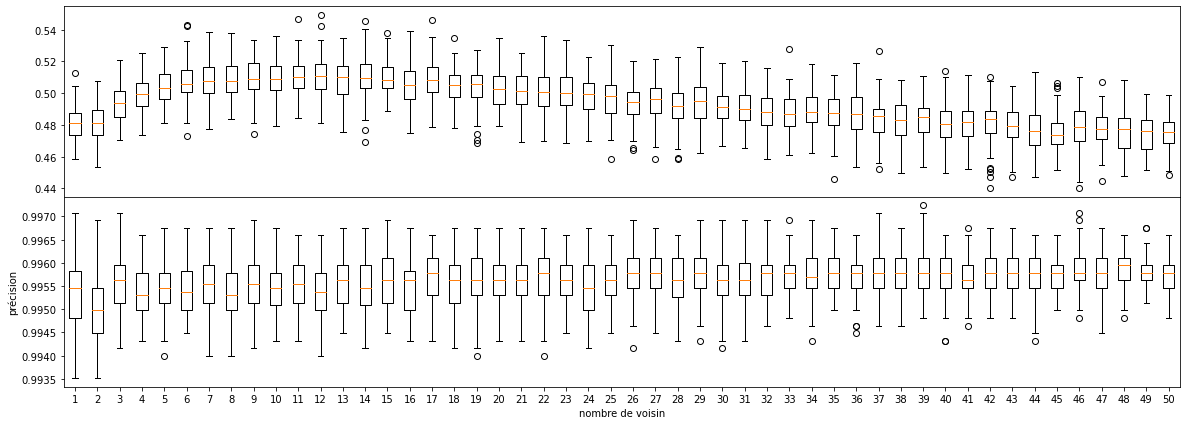

In [13]:
plotBoxPlotDouble(path = path_fo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataKNN,
            y_label = "précision",
            x_label = x_label_name,
            element_max=51,
            filename = filename)

### MO

In [14]:
path_mo = Path("./evaluation/mo/knn/statistic_knn_p1_weights_distance.json")
names = ["{}".format(i) for i in range(1, 51)]
x_label_name= "nombre de voisin"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/knn_mo")

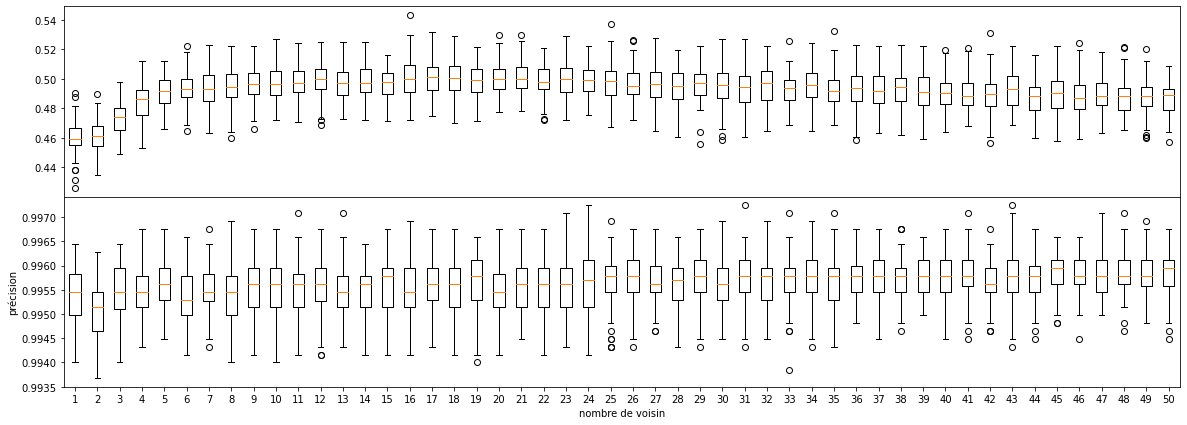

In [15]:
plotBoxPlotDouble(path = path_mo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataKNN,
            y_label = "précision",
            x_label = x_label_name,
            element_max=51,
            filename = filename)

### SMO

In [16]:
path_smo = Path("./evaluation/smo/knn/statistic_knn_p1_weights_distance.json")
names = ["{}".format(i) for i in range(1, 51)]
x_label_name= "nombre de voisin"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/knn_smo")

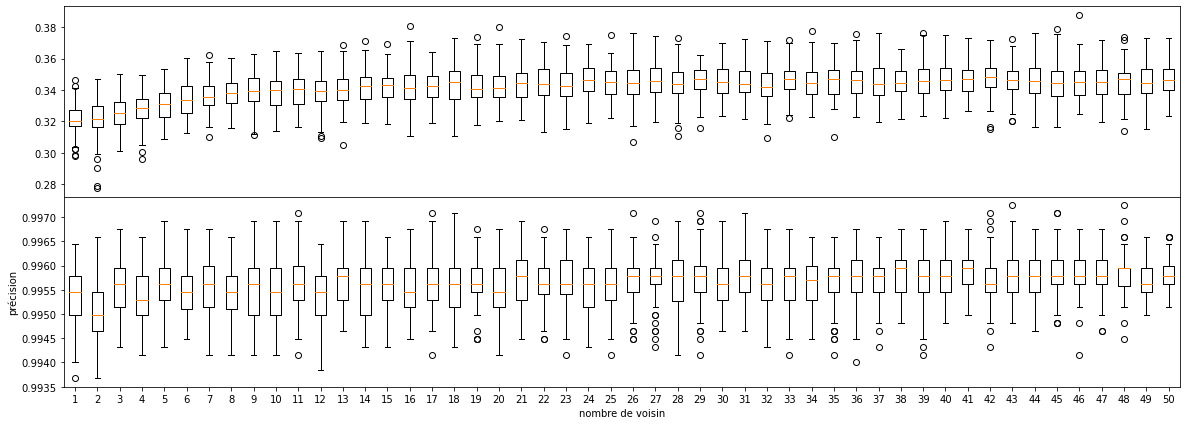

In [17]:
plotBoxPlotDouble(path = path_smo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataKNN,
            y_label = "précision",
            x_label = x_label_name,
            element_max=51,
            filename = filename)

## Tree

### FO

In [18]:
path_fo = Path("./evaluation/fo/tree/statistic_tree_eval_max_depth.json")
names = ["{}".format(i) for i in range(1, 50)]
x_label_name= "nombre de conditions maximales"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/tree_fo")

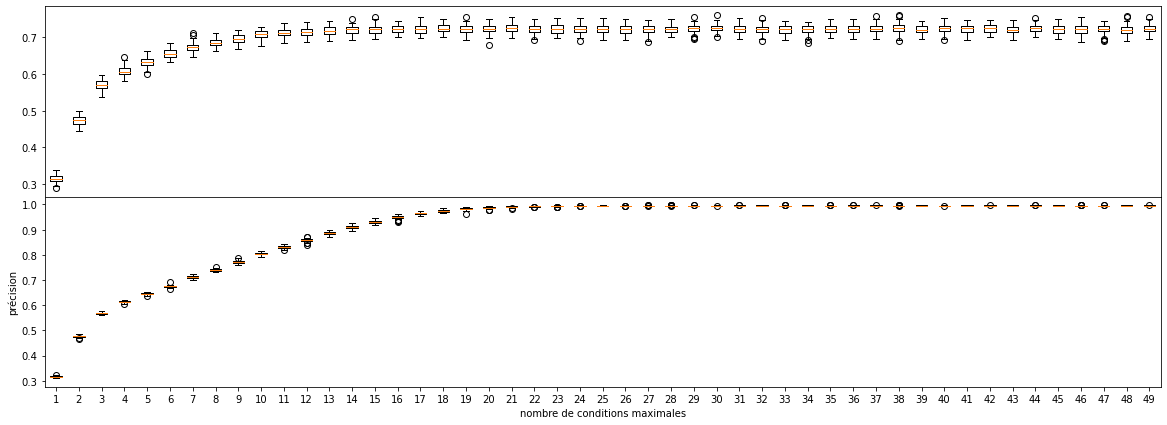

In [19]:
plotBoxPlotDouble(path = path_fo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataTree,
            y_label = "précision",
            x_label = x_label_name,
            element_max=50,
            filename = filename)

### MO

In [20]:
path_mo = Path("./evaluation/mo/tree/statistic_tree_eval_max_depth.json")
names = ["{}".format(i) for i in range(1, 50)]
x_label_name= "nombre de conditions maximales"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/tree_mo")

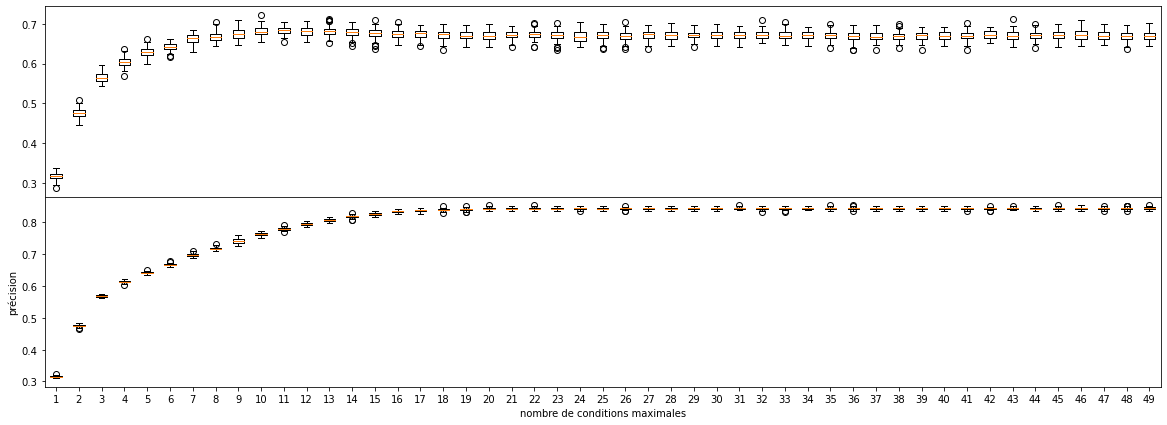

In [21]:
plotBoxPlotDouble(path = path_mo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataTree,
            y_label = "précision",
            x_label = x_label_name,
            element_max=50,
            filename = filename)

### SMO

In [22]:
path_smo = Path("./evaluation/smo/tree/statistic_tree_eval_max_depth.json")
names = ["{}".format(i) for i in range(1, 50)]
x_label_name= "nombre de conditions maximales"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/tree_smo")

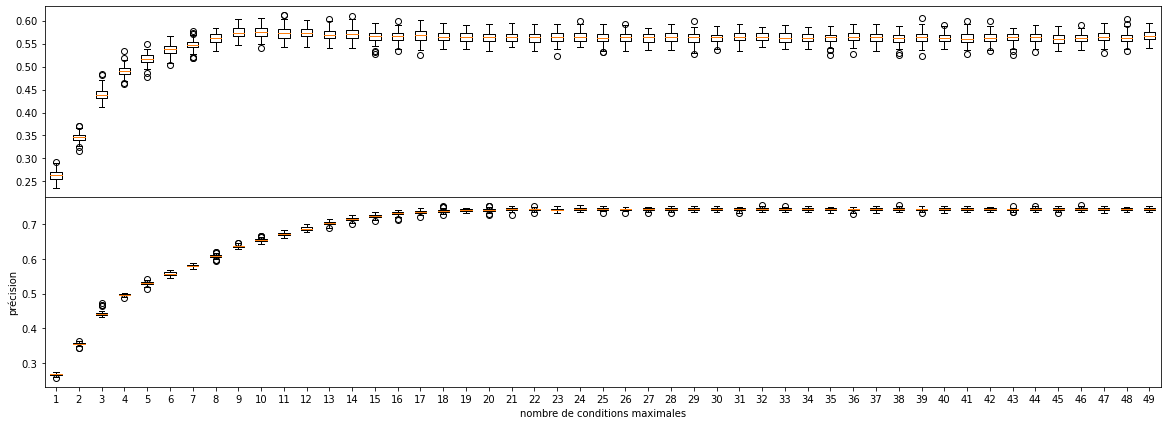

In [23]:
plotBoxPlotDouble(path = path_smo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataTree,
            y_label = "précision",
            x_label = x_label_name,
            element_max=50,
            filename = filename)

## SVM

### FO

#### poly

In [24]:
path_poly_fo = Path("./evaluation/fo/svm/statistic_svm_kernel_poly.json")
names = ["{}".format(i) for i in range(0, 30)]
x_label_name= "degré de la polyligne"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_poly_fo")

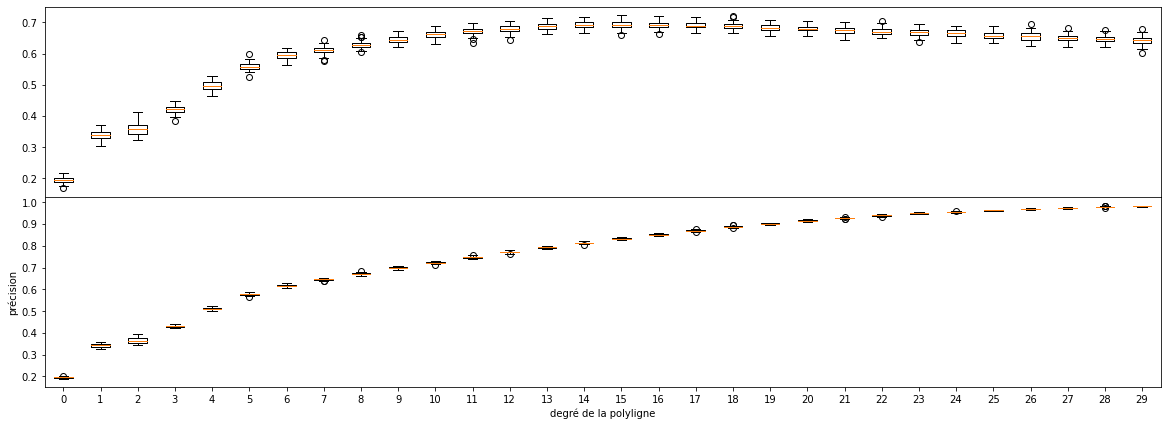

In [25]:
plotBoxPlotDouble(path = path_poly_fo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernelPoly,
            y_label = "précision",
            x_label = x_label_name,
            element_max=30,
            filename = filename)

#### Kernel

In [26]:
path_kernel_fo = Path("./evaluation/fo/svm/statistic_svm_kernels.json")
names = ['linear', 'rbf', 'sigmoid', ]
x_label_name= "kernel"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_kernel_fo")

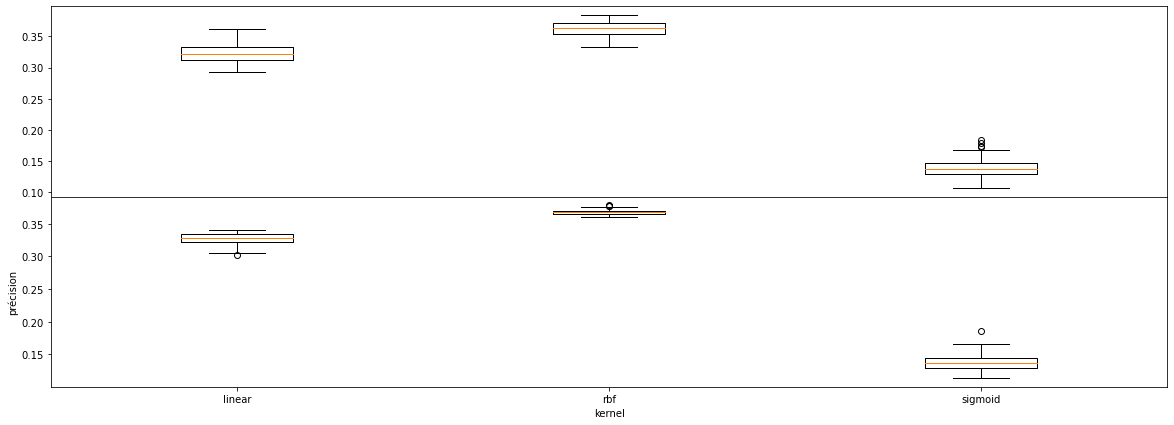

In [27]:
plotBoxPlotDouble(path = path_kernel_fo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernel,
            y_label = "précision",
            x_label = x_label_name,
           element_max=None,
           filename = filename)

### MO

#### poly

In [28]:
path_poly_mo = Path("./evaluation/mo/svm/statistic_svm_kernel_poly.json")
names = ["{}".format(i) for i in range(0, 50)]
x_label_name= "degré de la polyligne"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_poly_mo")

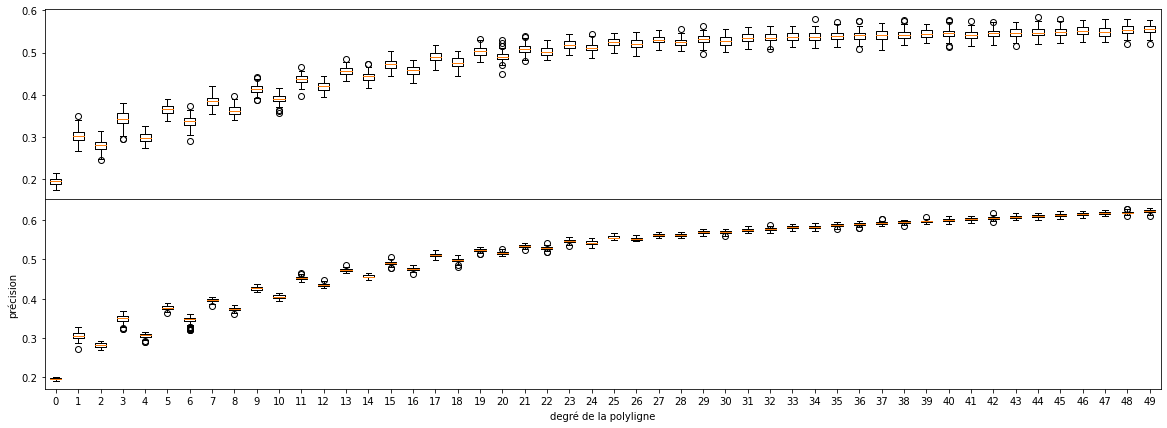

In [29]:
plotBoxPlotDouble(path = path_poly_mo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernelPoly,
            y_label = "précision",
            x_label = x_label_name,
            element_max=50,
            filename = filename)

#### Kernel

In [30]:
path_kernel_mo = Path("./evaluation/mo/svm/statistic_svm_kernels.json")
names = ['linear', 'rbf', 'sigmoid', ]
x_label_name= "kernel"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_kernel_mo")

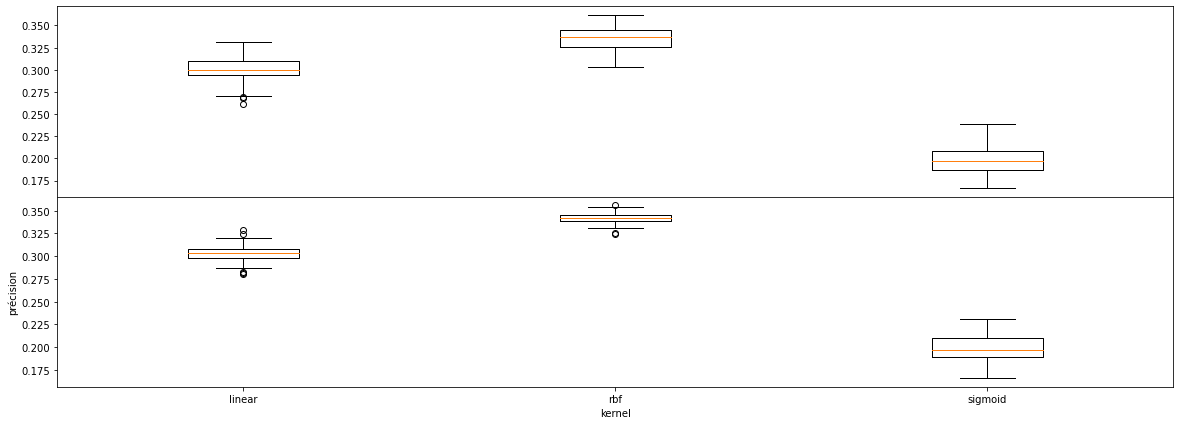

In [31]:
plotBoxPlotDouble(path = path_kernel_mo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernel,
            y_label = "précision",
            x_label = x_label_name,
            element_max=None,
            filename = filename)

### SMO

#### poly

In [32]:
path_poly_smo = Path("./evaluation/smo/svm/statistic_svm_kernel_poly.json")
names = ["{}".format(i) for i in range(0, 50)]
x_label_name= "degré de la polyligne"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_poly_smo")

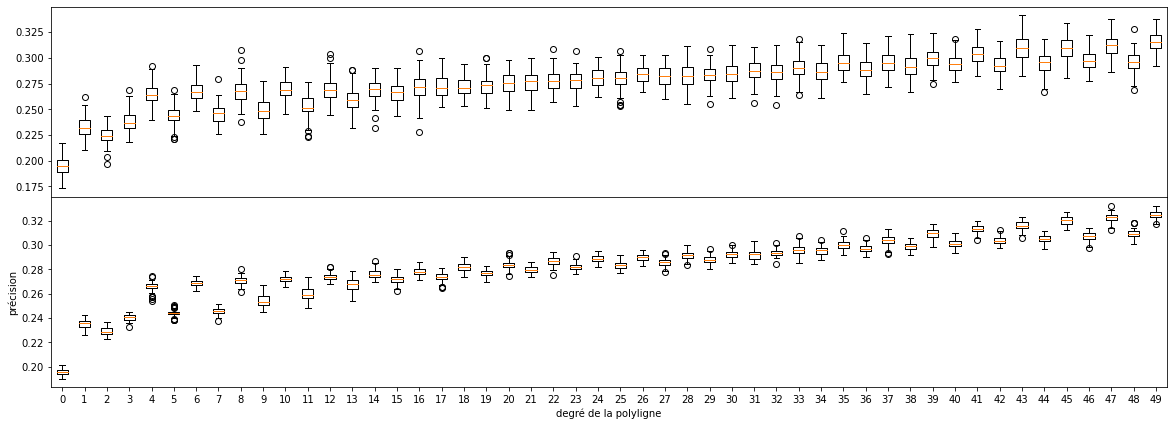

In [33]:
plotBoxPlotDouble(path = path_poly_smo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernelPoly,
            y_label = "précision",
            x_label = x_label_name,
            element_max=50,
            filename = filename)

#### Kernel

In [34]:
path_kernel_smo = Path("./evaluation/smo/svm/statistic_svm_kernels.json")
names = ['linear', 'rbf', 'sigmoid', ]
x_label_name= "kernel"
plt.rcParams['figure.figsize'] = [20, 7]
filename = Path("./figure/eval_ml/svm_kernel_mo")

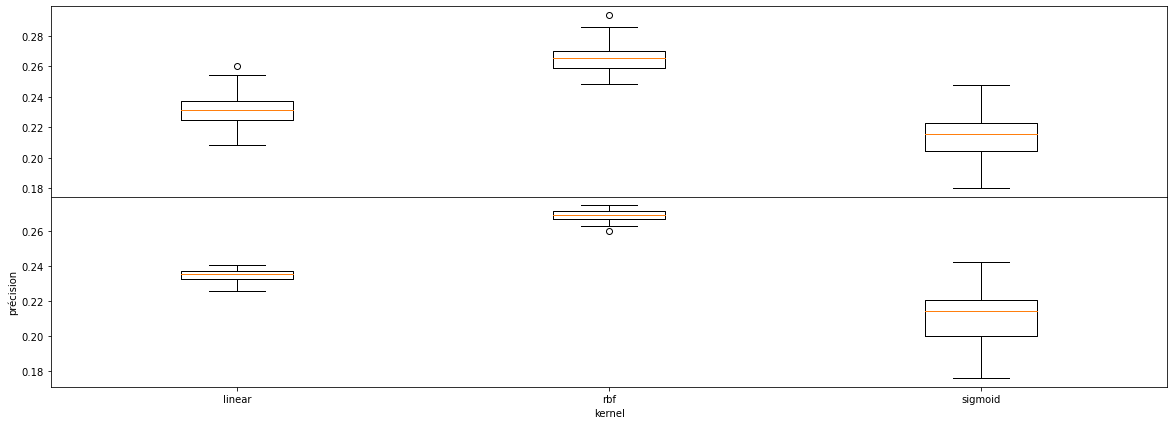

In [35]:
plotBoxPlotDouble(path = path_kernel_smo,
            names = names,
            indexes = ["acc_test", "acc_train"],
            extractor = extractDataSVMKernel,
            y_label = "précision",
            x_label = x_label_name,
            element_max=None,
            filename = filename)